## Observations and Insights 

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [56]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [57]:
# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [58]:
# Checking the number of mice.
mouse_count = mouse_df["Mouse ID"].count()
mouse_count

1893

In [59]:
# Checking the distinct number of mice.
distinctmouse_count = mouse_df["Mouse ID"].nunique()
distinctmouse_count

249

In [60]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_df[mouse_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
allduplicate_mice = mouse_df[mouse_df.duplicated(['Mouse ID',])]
allduplicate_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [62]:
uniquemice_df = mouse_df.drop_duplicates(subset=["Mouse ID","Timepoint"])
uniquemice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [63]:
# Checking the number of mice in the clean DataFrame.
uniquemice_count = uniquemice_df["Mouse ID"].count()
uniquemice_count

1888

## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, & SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_data = uniquemice_df[["Drug Regimen", "Tumor Volume (mm3)"]]
summary_data

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [65]:
grouped_data = summary_data.groupby(["Drug Regimen"])

summary_df = pd.DataFrame({
    "Mean": grouped_data["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": grouped_data["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Variance": grouped_data["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Deviation": grouped_data["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": grouped_data["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, & SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

aggdata = summary_data.groupby(["Drug Regimen"])
altsummary = aggdata.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
altsummary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

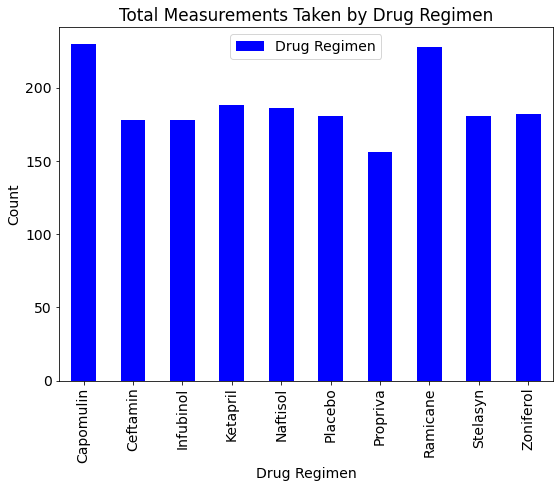

In [67]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Drug Regimen DF and count
regimen_group = uniquemice_df.groupby('Drug Regimen')
regimen_count = pd.DataFrame(regimen_group['Drug Regimen'].count())

# Bar Chart
bar_chart = regimen_count.plot(kind='bar', title="Total Measurements Taken by Drug Regimen", color="blue")

# Assign X and Y labels
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Count")
plt.tight_layout()

# Save chart
plt.savefig("Charts/BarChartPandas.png")

plt.show()


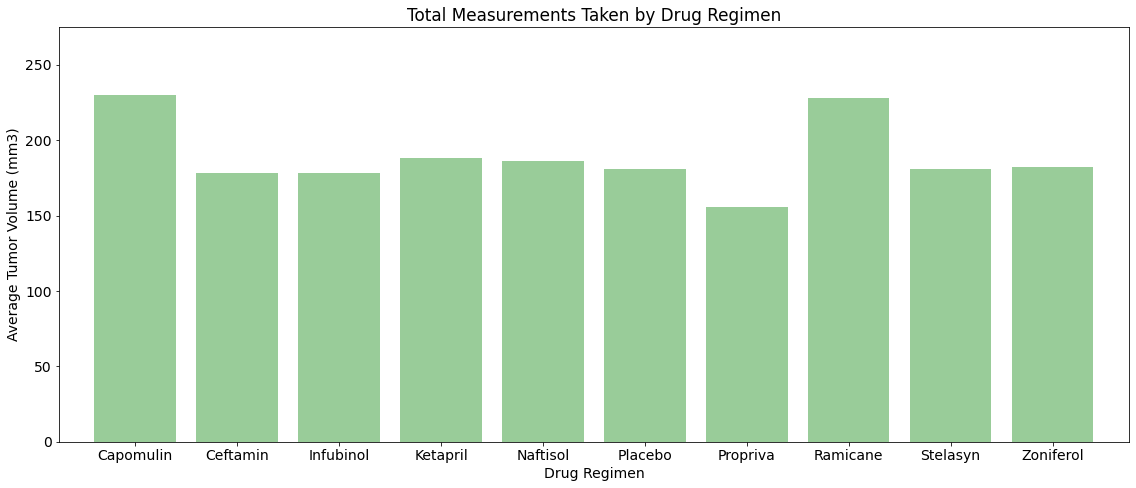

In [68]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Set X Axis and Tick Mark Locations
X_Axis = np.arange(len(regimen_count))
tick_locations = [value for value in X_Axis]

# Set Size, Color,tick style
plt.figure(figsize=(16,7))
plt.bar(X_Axis, regimen_count['Drug Regimen'], color='green', alpha=0.4)
plt.xticks(tick_locations, list(regimen_count.index), rotation="0") 

# Set Limits
plt.xlim(-0.75, len(X_Axis) - 0.25)
plt.ylim(0, 275)

# Set Labels and Titles
plt.title("Total Measurements Taken by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()

# Save chart
plt.savefig("Charts/BarChartPyplot.png")

plt.show()


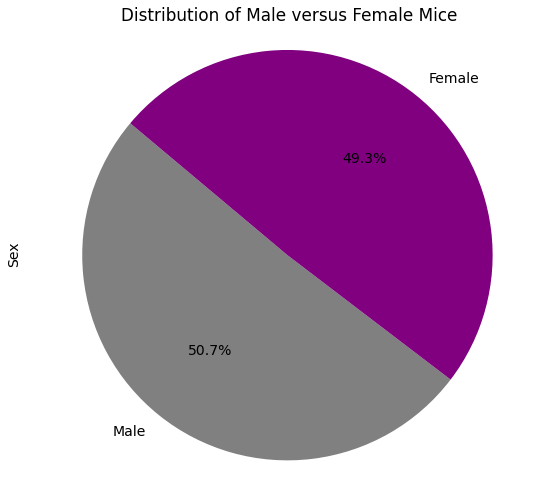

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = uniquemice_df.groupby('Sex')
# mice_gender.head()

mice_gender_count = pd.DataFrame(mice_gender["Sex"].count())
# mice_gender_count.head()

mice_gender_count = uniquemice_df["Sex"].value_counts()
plt.figure()
mice_gender_count.plot(kind="pie", autopct='%1.1f%%',shadow=False, startangle=140, fontsize=14, colors =["gray","purple"], legend =False)
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of Male versus Female Mice")
plt.tight_layout()
plt.savefig("Charts/PieChartPandas.png")
plt.show()

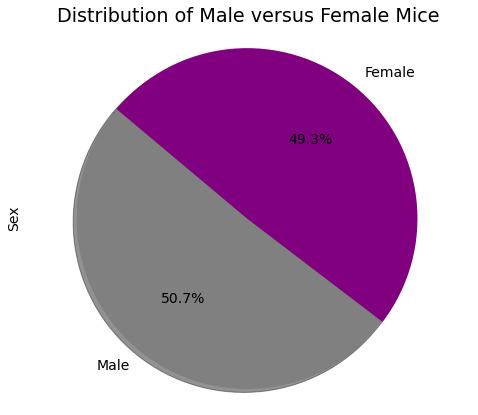

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get Labels for our pie chart from the index values of the groupby dataframe

micegender = list(mice_gender_count.index.values)
# mice_genders = ["Female"],["Male"]

# # The values of each section of the pie chart
# mice_gender_counts = mice_gender_count["Sex"].count

# The colors of each section of the pie chart
colors = ["gray", "purple"]


# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(mice_gender_count, labels=micegender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of Male versus Female Mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.savefig("Charts/PieChartPyplot.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [71]:
# # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = uniquemice_df.loc[uniquemice_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = uniquemice_df.loc[uniquemice_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = uniquemice_df.loc[uniquemice_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = uniquemice_df.loc[uniquemice_df["Drug Regimen"] == "Ceftamin", :]

In [72]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

#Capomulin

Capomulinlast = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulinlastvol = pd.DataFrame(Capomulinlast)
Capomulinlastmerge = pd.merge(Capomulinlastvol, uniquemice_df, on=("Mouse ID","Timepoint"),how="left")
Capomulinlastmerge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [73]:
Capomulintumors = Capomulinlastmerge["Tumor Volume (mm3)"]

quartiles = Capomulintumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could also be outliers.")

#Ramicane

Ramicanelast = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicanelastvol = pd.DataFrame(Ramicanelast)
Ramicanelastmerge = pd.merge(Ramicanelastvol, uniquemice_df, on=("Mouse ID","Timepoint"),how="left")
Ramicanelastmerge.head(10)

Ramicanetumors = Ramicanelastmerge["Tumor Volume (mm3)"]

quartiles2 = Ramicanetumors.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")



#Infubinol
Infubinollast = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinollastvol = pd.DataFrame(Infubinollast)
Infubinollastmerge = pd.merge(Infubinollastvol, uniquemice_df, on=("Mouse ID","Timepoint"),how="left")
Infubinollastmerge.head(10)

Infubinoltumors = Infubinollastmerge["Tumor Volume (mm3)"]

quartiles3 = Infubinoltumors.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3} could be outliers.")


#Ceftamin
Ceftaminlast = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftaminlastvol = pd.DataFrame(Ceftaminlast)
Ceftaminlastmerge = pd.merge(Ceftaminlastvol, uniquemice_df, on=("Mouse ID","Timepoint"),how="left")
Ceftaminlastmerge.head(10)

Ceftamintumors = Ceftaminlastmerge["Tumor Volume (mm3)"]

quartiles4 = Ceftamintumors.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could also be outliers.
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


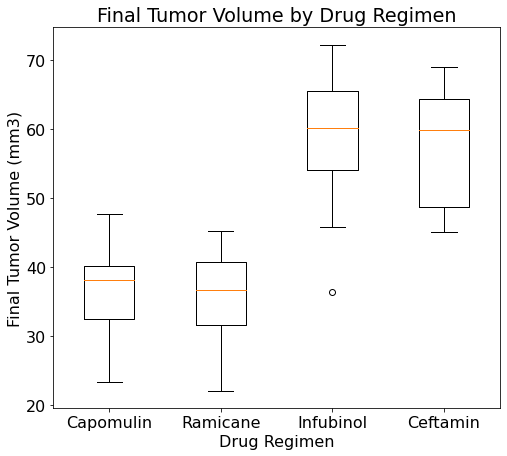

In [74]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_tumor = [Capomulintumors, Ramicanetumors, Infubinoltumors, Ceftamintumors]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
plt.rcParams['font.size'] = 14
ax1.boxplot(plot_tumor, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig("Charts/BoxWhisker.png")

plt.show()

## Line and Scatter Plots

In [75]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_treatment = uniquemice_df.loc[uniquemice_df['Drug Regimen'] == 'Capomulin']

capomulin_treatment.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [76]:
capomulin_vol_tumor = capomulin_treatment.groupby(['Timepoint']).agg(Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),).round(3)

# View the groupby dataframe 
capomulin_vol_tumor.head(10)


,Tumor_Vol_Mean
Timepoint,
0,45.000
5,44.266
10,43.084
15,42.064
20,40.716
25,39.940
30,38.769
35,37.817
40,36.958


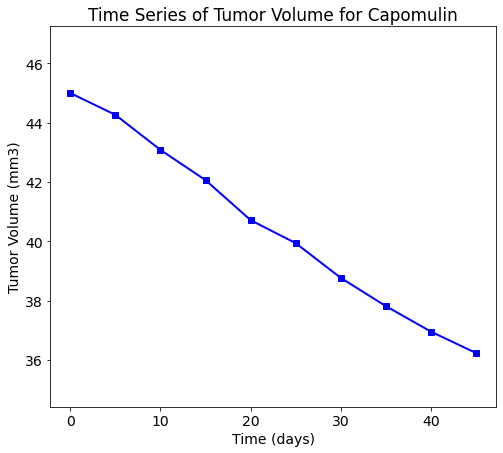

In [77]:
# get the values for the x axis
x_series = list(capomulin_vol_tumor.index.values)

# format x values, lines and width of line
plt.errorbar(
    x_series, 
    capomulin_vol_tumor['Tumor_Vol_Mean'],
    label="Time Series of Tumor Volume for Capomulin",
    fmt="bs-", 
    linewidth=2)

# Add the descriptive title, x labels and y labels
plt.title("Time Series of Tumor Volume for Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

# Set x and y limits 
plt.xlim(min(x_series)-max(x_series)*0.05, max(x_series)*1.05)
plt.ylim(min(capomulin_vol_tumor['Tumor_Vol_Mean'])*0.95, max(capomulin_vol_tumor['Tumor_Vol_Mean'])*1.05)
plt.rcParams["figure.figsize"] = [8,7]

# Save the figure
plt.savefig("Charts/LineTumorVolTime.png")

plt.show()

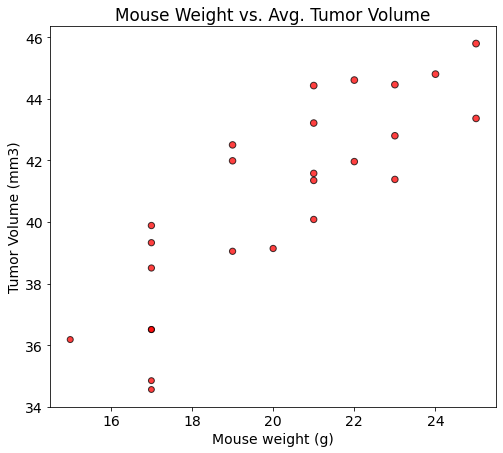

In [78]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_treatment.head()

capomulin_mouse_id = capomulin_treatment.groupby(['Mouse ID']).agg(Mouse_weight=('Weight (g)', np.mean), Tumor_vol_avg=('Tumor Volume (mm3)', np.mean)\
).round(3)
capomulin_mouse_id.head(30)

#create scatter plot from the above dataframe
plt.scatter(
   capomulin_mouse_id['Mouse_weight'],
   capomulin_mouse_id['Tumor_vol_avg'],
    marker='o',
    facecolors='red',
    edgecolors='black',
    s=capomulin_mouse_id['Tumor_vol_avg'],
    alpha=.75)

# Create a title, x label, and y label for our chart
plt.title("Mouse Weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# Save the charts
plt.savefig("Charts/ScatterWeightTumor.png")

plt.show()

## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.8419461020261081
The equation of the regression line is: y = 0.95x + 21.55


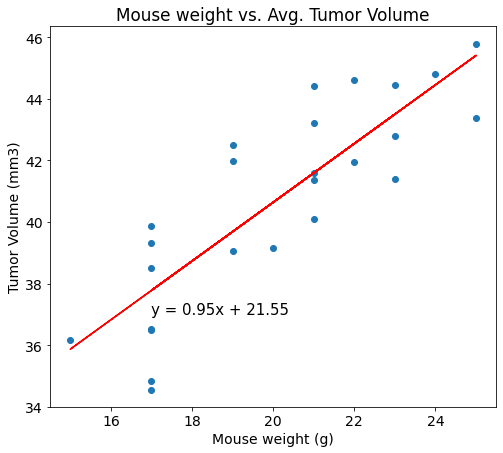

In [80]:
# Calculate the correlation coefficient and linear regression model 

correlationcoeff = st.pearsonr(capomulin_mouse_id['Mouse_weight'],capomulin_mouse_id['Tumor_vol_avg'])
print(f"The correlation between both factors is {round(correlationcoeff[0],2)}")

x_values = capomulin_mouse_id['Mouse_weight']
y_values = capomulin_mouse_id['Tumor_vol_avg']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

# Save the chart
plt.savefig("Charts/Scattercorrelationcoefficient.png")

plt.show()